<a href="https://colab.research.google.com/github/matchbou/Public/blob/master/pulp_intro_20200813aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 整数線形最適化モジュールPuLPの簡単な紹介

ここでは，Pythonで使える線形整数最適化モジュール[PuLP](https://pythonhosted.org/PuLP/)を紹介する．
以下では，Python3とGoogle colaboratoryを使うことを仮定する．

最初にPuLPをimportする．

In [ ]:
import pulp

ModuleNotFoundError: ignored

2019年9月現在，Google colaboratoryにはモジュールPuLPはインストールされていない．
よってまず，モジュールPuLPをインストールする．

Google colaboratoryでは!を最初につけることによってUNIXコマンドを実行できる．

In [ ]:
!pip install pulp

     |████████████████████████████████| 13.6MB 2.9MB/s 
  Created wheel for pulp: filename=PuLP-1.6.10-cp36-none-any.whl size=12269903 sha256=f65ca5a9f4d49f04f5feb9006ad702b784aea9f1cab127b2d6f23f3f0809aae9
  Stored in directory: /root/.cache/pip/wheels/5e/76/77/e28b22219e46e3b4b033f02e8b36b2770ae545bdcf60c2b224
Successfully built pulp


インストールが完了したら，改めてPuLPをimportする．

In [ ]:
import pulp

今度はimportできた．

PuLPを使う準備ができたので，いくつか最適化問題を解いてみたい．

## PuLPで線形最適化問題を解いてみる



まず，以下の線形最適化問題
\begin{align*}
\text{max.} \quad & 3 x + 4 y + 2 z \\
\text{s. t.} \quad & 2 x \le 4, \\
& x + 2 z \le 8, \\
& 3 y + z \le 6, \\
& x \ge 0, \ y \ge 0, \ z \ge 0,
\end{align*}
を解いてみる．

すでにPuLPをimportしているので，PuLPのメソッドLpProblemを用いて，線形最適化問題のinstanceを作る．
そして作ったinstanceの名前をlpとする．

In [ ]:
lp = pulp.LpProblem(name='Linear optimization: an example', sense=pulp.LpMaximize)

最大化問題か最小化問題かは引数senseで指定する．
最大化問題にしたいときはpulp.LpMaximize，最小化問題にしたいときはpulp.LpMinimizeを指定する．
なお，引数senseの指定を省略するとデフォルト値のpulp.LpMinimizeが適用されるようである．

さらに，上記の例では問題の名前も引数nameで指定している．

次に，PuLPのメソッドLpVariableを用いて，線形最適化問題の変数のinstanceを作る．

In [ ]:
x = pulp.LpVariable(name='x', lowBound=0)
y = pulp.LpVariable(name='y', lowBound=0)
z = pulp.LpVariable(name='z', lowBound=0)

引数lowBoundは変数の値の下限である．
線形最適化問題を記述する際は通常，変数の下限・上限も制約式として記述する．
しかし多くの最適化ソフトウェアでは，変数を設定する際に下限・上限も設定できる．
PuLPも例外ではないようだ．

次に，問題lpに目的関数を加える．

In [ ]:
lp += 3 * x + 4 * y + 2 * z

問題に線形式（の表現）を加えると，最初のものが目的関数として設定されるようだ．

次に，問題lpに制約を加える．

In [ ]:
lp += 2 * x <= 4
lp += x + 2 * z <= 8
lp += 3 * y + z <= 6

続けて問題lpに線形不等式（あるいは等式）を加えると，制約として追加できる．
これで問題lpの設定は完了である．

問題lpをPythonの組み込み関数printで表示してみる．

In [ ]:
print(lp)

Linear optimization: an example:
MAXIMIZE
3*x + 4*y + 2*z + 0
SUBJECT TO
_C1: 2 x <= 4

_C2: x + 2 z <= 8

_C3: 3 y + z <= 6

VARIABLES
x Continuous
y Continuous
z Continuous



どうやら，こういう形式で表示されるようだ．

問題を設定（あるいは入力）できたので，最適解を求めてみる．
最適化のメソッドはsolveである．

In [ ]:
lp.solve()

1

最適解が得られると，戻り値として1が返ってくるようである． 
問題の設定によっては「解がない」「解はあるけれど際限なく最大化（あるいは最小化）できる」ということもある．
それらの場合に返ってくる値は[LpStatus](https://pythonhosted.org/PuLP/constants.html)
を参照していただきたい．

最後に，最適解を表示する．
最適解は変数のメソッドvalueで得られる．

In [ ]:
print(x.value(), y.value(), z.value())

2.0 1.0 3.0


地味だが，最適解を確認できた．

最適値は最適解から簡単に得られる．

## 次に整数最適化問題を解いてみる

次は以下の整数最適化問題
\begin{align*}
\text{max.}\quad & 16 x_1 + 19 x_2 + 23 x_3 + 28 x_4 \\
\text{s. t.}\quad & 2 x_1 + 3 x_2 + 4 x_3 + 5 x_4 \le 7, \\
& x_i \in \mathbb{Z}_{\ge 0} \qquad (i=1, 2, 3, 4),
\end{align*}
を解いてみる．
ここで$\mathbb{Z}_{\ge 0}$は非負整数の集合である．
この問題は俗にナップサック問題とよばれるものの一例である．

今度は問題のinstanceをknapという名前にする．
問題と変数のinstanceを作る．

In [ ]:
knap = pulp.LpProblem(name='0-1 knapsack problem', sense=pulp.LpMaximize)

In [ ]:
x1 = pulp.LpVariable(name='x1', cat='Integer', lowBound=0)
x2 = pulp.LpVariable(name='x2', cat='Integer', lowBound=0)
x3 = pulp.LpVariable(name='x3', cat='Integer', lowBound=0)
x4 = pulp.LpVariable(name='x4', cat='Integer', lowBound=0)

メソッドLpVariableの引数catは変数の種類である．
連続変数はContinuous，整数変数はInteger，0-1変数はBinaryである．
省略するとデフォルト値のContinuousが適用されるみたいである．
よって先程の線形最適化問題の場合には上手くいっていた．

次に制約を加えて問題を表示する．

In [ ]:
knap += 16 * x1 + 19 * x2 + 23 * x3 + 28 * x4
knap += 2 * x1 + 3 * x2 + 4 * x3 + 5 * x4 <= 7

In [ ]:
print(knap)

Knapsack problem:
MAXIMIZE
16*x1 + 19*x2 + 23*x3 + 28*x4 + 0
SUBJECT TO
_C1: 2 x1 + 3 x2 + 4 x3 + 5 x4 <= 7

VARIABLES
0 <= x1 Integer
0 <= x2 Integer
0 <= x3 Integer
0 <= x4 Integer



さらに最適化して，得られた最適解も確認する．

In [ ]:
knap.solve()

1

In [ ]:
print(x1.value(), x2.value(), x3.value(), x4.value())

2.0 1.0 0.0 0.0


今回はここまでとする．

以下はまだ製作中なのでご勘弁願いたい．

In [ ]:
import networkx as nx

In [ ]:
shortest_path.solve()

1

In [ ]:
print(f'x12={x12.value()},  x13={x13.value()},  x23={x23.value()},  x24={x24.value()},  x34={x34.value()}')

x12=1.0,  x13=0.0,  x23=1.0,  x24=0.0,  x34=1.0


/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


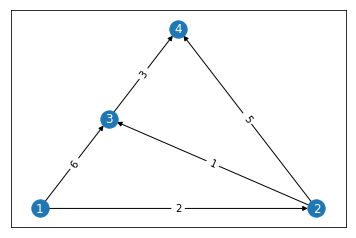

In [ ]:
G3 = nx.DiGraph()
G3.add_edge(1, 2, weight=2)
G3.add_edge(1, 3, weight=6)
G3.add_edge(2, 3, weight=1)
G3.add_edge(2, 4, weight=5)
G3.add_edge(3, 4, weight=3)
%matplotlib inline
nx.draw_networkx(G3, pos=nx.drawing.layout.planar_layout(G3), font_color='w')
_= nx.draw_networkx_edge_labels(G3, pos=nx.drawing.layout.planar_layout(G3), edge_labels=nx.get_edge_attributes(G3, 'weight'))  

In [ ]:
shortest_path = pulp.LpProblem(name='Shortest path problem', sense=pulp.LpMinimize)
x = {}
for e in G3.edges():
    x[e] = pulp.LpVariable(name=f'x{e}', cat='Continuous', lowBound=0, upBound=1)
shortest_path += pulp.LpAffineExpression([(x[e], G3.edges[e]['weight']) for e in G3.edges()])
for v in G3.nodes():
    first_term = pulp.LpAffineExpression([(x[e], 1) for e in G3.in_edges(v)])
    second_term = pulp.LpAffineExpression([(x[e], 1) for e in G3.out_edges(v)])
    if v == 1:
        right_hand_side = -1
    elif v == 4:
        right_hand_side = 1
    else:
        right_hand_side = 0
    shortest_path += first_term - second_term == right_hand_side
print(shortest_path)

Shortest path problem:
MINIMIZE
2*x(1,_2) + 6*x(1,_3) + 1*x(2,_3) + 5*x(2,_4) + 3*x(3,_4) + 0
SUBJECT TO
_C1: - x(1,_2) - x(1,_3) = -1

_C2: x(1,_2) - x(2,_3) - x(2,_4) = 0

_C3: x(1,_3) + x(2,_3) - x(3,_4) = 0

_C4: x(2,_4) + x(3,_4) = 1

VARIABLES
x(1,_2) <= 1 Continuous
x(1,_3) <= 1 Continuous
x(2,_3) <= 1 Continuous
x(2,_4) <= 1 Continuous
x(3,_4) <= 1 Continuous



In [ ]:
shortest_path.solve()
for 枝 in G3.edges():
    print(f'枝は{枝}, 解は{x[枝].value()}')
print(f'最適値は{sum([G3.edges[e]["weight"] * x[e].value() for e in G3.edges()])}')

枝は(1, 2), 解は1.0
枝は(1, 3), 解は0.0
枝は(2, 3), 解は1.0
枝は(2, 4), 解は-0.0
枝は(3, 4), 解は1.0
最適値は6.0


In [ ]:
mst = pulp.LpProblem(name='Minimum spanning tree', sense=pulp.LpMinimize)
x1 = pulp.LpVariable(name='x1', cat='Binary')
x2 = pulp.LpVariable(name='x2', cat='Binary')
x3 = pulp.LpVariable(name='x3', cat='Binary')
x4 = pulp.LpVariable(name='x4', cat='Binary')
x5 = pulp.LpVariable(name='x5', cat='Binary')
mst += 2 * x1 + 3 * x2 + 5 * x3 + 4 * x4 + 1 * x5
mst += x1 + x2 + x3 + x4 + x5 == 3
#mst += x3 + x4 + x5 <= 2
mst += x1 + x2 + x5 <= 2
print(mst)

Minimum spanning tree:
MINIMIZE
2*x1 + 3*x2 + 5*x3 + 4*x4 + 1*x5 + 0
SUBJECT TO
_C1: x1 + x2 + x3 + x4 + x5 = 3

_C2: x1 + x2 + x5 <= 2

VARIABLES
0 <= x1 <= 1 Integer
0 <= x2 <= 1 Integer
0 <= x3 <= 1 Integer
0 <= x4 <= 1 Integer
0 <= x5 <= 1 Integer



In [ ]:
mst.solve()
print(x1.value(), x2.value(), x3.value(), x4.value(), x5.value())

1.0 0.0 0.0 1.0 1.0


In [ ]:
mst_flow = pulp.LpProblem(name='Minimum spanning tree with flow', sense=pulp.LpMinimize)
x1 = pulp.LpVariable(name='x1', cat='Binary')
x2 = pulp.LpVariable(name='x2', cat='Binary')
x3 = pulp.LpVariable(name='x3', cat='Binary')
x4 = pulp.LpVariable(name='x4', cat='Binary')
x5 = pulp.LpVariable(name='x5', cat='Binary')
y12 = pulp.LpVariable(name='y12', lowBound=0)
y21 = pulp.LpVariable(name='y21', lowBound=0)
y13 = pulp.LpVariable(name='y13', lowBound=0)
y31 = pulp.LpVariable(name='y31', lowBound=0)
y14 = pulp.LpVariable(name='y14', lowBound=0)
y41 = pulp.LpVariable(name='y41', lowBound=0)
y24 = pulp.LpVariable(name='y24', lowBound=0)
y42 = pulp.LpVariable(name='y42', lowBound=0)
y34 = pulp.LpVariable(name='y34', lowBound=0)
y43 = pulp.LpVariable(name='y43', lowBound=0)
mst_flow += 2 * x1 + 3 * x2 + 5 * x3 + 4 * x4 + 1 * x5
mst_flow += x1 + x2 + x3 + x4 + x5 == 3
mst_flow += y12 <= 3 * x1
mst_flow += y21 <= 3 * x1
mst_flow += y13 <= 3 * x4
mst_flow += y31 <= 3 * x4
mst_flow += y14 <= 3 * x5
mst_flow += y41 <= 3 * x5
mst_flow += y24 <= 3 * x2
mst_flow += y42 <= 3 * x2
mst_flow += y34 <= 3 * x3
mst_flow += y43 <= 3 * x3
mst_flow += y12 <= 3 * x1
mst_flow += y12 + y13 + y14 - y21 - y31 - y41 == 3
mst_flow += y21 + y24 - y12 - y42 == -1
mst_flow += y31 + y34 - y13 - y43 == -1
mst_flow += y41 + y42 + y43 - y14 - y24 - y34 == -1
print(mst_flow)

Minimum spanning tree with flow:
MINIMIZE
2*x1 + 3*x2 + 5*x3 + 4*x4 + 1*x5 + 0
SUBJECT TO
_C1: x1 + x2 + x3 + x4 + x5 = 3

_C2: - 3 x1 + y12 <= 0

_C3: - 3 x1 + y21 <= 0

_C4: - 3 x4 + y13 <= 0

_C5: - 3 x4 + y31 <= 0

_C6: - 3 x5 + y14 <= 0

_C7: - 3 x5 + y41 <= 0

_C8: - 3 x2 + y24 <= 0

_C9: - 3 x2 + y42 <= 0

_C10: - 3 x3 + y34 <= 0

_C11: - 3 x3 + y43 <= 0

_C12: - 3 x1 + y12 <= 0

_C13: y12 + y13 + y14 - y21 - y31 - y41 = 3

_C14: - y12 + y21 + y24 - y42 = -1

_C15: - y13 + y31 + y34 - y43 = -1

_C16: - y14 - y24 - y34 + y41 + y42 + y43 = -1

VARIABLES
0 <= x1 <= 1 Integer
0 <= x2 <= 1 Integer
0 <= x3 <= 1 Integer
0 <= x4 <= 1 Integer
0 <= x5 <= 1 Integer
y12 Continuous
y13 Continuous
y14 Continuous
y21 Continuous
y24 Continuous
y31 Continuous
y34 Continuous
y41 Continuous
y42 Continuous
y43 Continuous



In [ ]:
mst_flow.solve()
print(x1.value(), x2.value(), x3.value(), x4.value(), x5.value())

1.0 0.0 0.0 1.0 1.0


In [ ]:
print(f'y12: {y12.value()},    y21: {y21.value()},    y13: {y13.value()},    y31: {y31.value()}')
print(f'y14: {y14.value()},    y41: {y41.value()},    y34: {y34.value()},    y43: {y43.value()}')
print(f'y24: {y24.value()},    y42: {y42.value()}')

y12: 3.0,    y21: 2.0,    y13: 0.0,    y31: -1.0
y14: 3.0,    y41: 2.0,    y34: 0.0,    y43: 0.0
y24: 3.0,    y42: 3.0
